# Advanced data manipulation with xarray: Introduction to climate indices.

*Notebook by Marian Osei and Leif Denby*

The <b>xclim</b> package in python supports direct calculations of climate indices which are in the netcdf format. Xclim currently provides over 50 indices related to mean, minimum and maximum daily temperature, daily precipitation, streamflow and sea ice concentration. It is built using `xarray` with the objective to simplify as much as possible for users to compute indices from large climate datasets and for scientists to write new indices with very little trouble. 

We will be using a sample CHIRPS rainfall dataset over a river catchment in Ghana called Pra. The rainfall dataset spans 1981 to 2020. Temperature data for ERA5 (t2m) will be used to compute temperature indices.

Useful link to the `xclim` indices can be obtained at: https://xclim.readthedocs.io/en/stable/indices.html

Below are links to relevant <b>xclim</b> modules:

- General xclim indices: https://xclim.readthedocs.io/en/stable/indices.html

- Icclim indices: https://xclim.readthedocs.io/en/stable/indicators_api.html#icclim-indices

- Atmospheric indicators: https://xclim.readthedocs.io/en/stable/indicators_api.html#

- Land indicators: https://xclim.readthedocs.io/en/stable/indicators_api.html#land-indicators

- Ice-related indicators: https://xclim.readthedocs.io/en/stable/indicators_api.html#ice-related-indicators

- Bio-climatic indices: https://xclim.readthedocs.io/en/stable/indicators_api.html#anuclim-indices

- Fire weather indices: https://xclim.readthedocs.io/en/stable/indices.html#fire-weather-indices-submodule

- Generic indices: https://xclim.readthedocs.io/en/stable/indices.html#generic-indices-submodule

- Run-length indices:  https://xclim.readthedocs.io/en/stable/indices.html#run-length-algorithms-submodule

- Other xclim indices: https://xclim.readthedocs.io/en/stable/api.html#other-xclim-modules

- Statistical downscaling and bias-adjustment: https://xclim.readthedocs.io/en/stable/notebooks/sdba.html?

- Statistical downscaling and bias-adjustment (advanced tools): https://xclim.readthedocs.io/en/stable/notebooks/sdba-advanced.html
              
    
Objectives:

1. How to calculate rainfall indices
2. How to calculate temperature indices

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path

import xclim as xc
import xclim.indices as xci
from xclim.core.calendar import percentile_doy
import xclim.indicators.atmos as xcia

%matplotlib inline

In [2]:
# As before, if you have un-zipped the datasets to a different path change the `data_path` below
data_path = Path("../data/")

## Rainfall (precipitation) indecies

In [3]:
# first we'll open up the CHIPS dataset and have a look inside
ds = xr.open_dataset(data_path / 'PRA_chirps_1981_2019.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 45, longitude: 38, time: 14457)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2020-07-31
  * longitude  (longitude) float32 -2.225 -2.175 -2.125 ... -0.475 -0.425 -0.375
  * latitude   (latitude) float32 5.075 5.125 5.175 5.225 ... 7.175 7.225 7.275
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.9.9rc1 (https://mpime...
    Conventions:       CF-1.6
    history:           Mon Dec 28 22:59:10 2020: cdo mergetime pra_chirps-v2....
    institution:       Climate Hazards Group.  University of California at Sa...
    title:             CHIRPS Version 2.0
    version:           Version 2.0
    date_created:      2015-11-20
    creator_name:      Pete Peterson
    creator_email:     pete@geog.ucsb.edu
    documentation:     http://pubs.usgs.gov/ds/832/
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
    CDO:               Climate Data Operators version 1.9.9rc1 (https://mpime...

In [4]:
# we will be working only with the `precip` data-array, so let's get a reference to that
da_pr = ds.precip

In [5]:
# let's next compute the daily precipitation intensity
daily_int_year = xci.daily_pr_intensity(da_pr, thresh='5 mm/day')
daily_int_year

<xarray.DataArray 'precip' (time: 40, latitude: 45, longitude: 38)>
array([[[21.28830863, 21.51486582, 20.89446269, ...,         nan,
                 nan,         nan],
        [20.880767  , 21.45871989, 20.81788485, ...,         nan,
                 nan,         nan],
        [18.01787326, 18.8874335 , 18.23639719, ...,         nan,
                 nan,         nan],
        ...,
        [17.03837339, 17.41964017, 16.76655848, ..., 11.70374305,
         11.94039578, 11.89253743],
        [16.76029358, 17.2352043 , 16.48556698, ..., 11.90710116,
         11.61375026, 11.22650037],
        [16.92791651, 16.70346365, 17.10316123, ..., 11.46091806,
         11.46498371, 11.17162762]],

       [[21.2132156 , 21.13099299, 21.38156526, ...,         nan,
                 nan,         nan],
        [20.45710053, 20.28400978, 20.46200783, ...,         nan,
                 nan,         nan],
        [19.08996261, 18.24975429, 17.55482225, ...,         nan,
                 nan,         nan],
...
        [11.94789673, 11.70853097, 12.5676189 , ..., 13.61087149,
         13.83544687, 14.00304209],
        [12.34865887, 12.36513974, 11.98615256, ..., 14.06339005,
         14.09766229, 13.93793156],
        [12.83404756, 12.07882401, 12.38187663, ..., 13.91575095,
         13.75727744, 13.663489  ]],

       [[15.63918888, 13.71917725, 13.07660027, ...,         nan,
                 nan,         nan],
        [14.47907198, 12.66091865, 12.80826669, ...,         nan,
                 nan,         nan],
        [12.98291888, 13.05968262, 12.44101666, ...,         nan,
                 nan,         nan],
        ...,
        [12.85264123, 12.92878723, 12.48404491, ..., 12.91996042,
         11.90105693, 12.10062066],
        [12.11831538, 12.77589383, 11.85758667, ..., 12.91633365,
         12.35989969, 12.92011202],
        [11.74307438, 11.28854789, 12.36385473, ..., 12.85892596,
         12.80402137, 13.01290951]]])
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1982-01-01 ... 2020-01-01
  * longitude  (longitude) float32 -2.225 -2.175 -2.125 ... -0.475 -0.425 -0.375
  * latitude   (latitude) float32 5.075 5.125 5.175 5.225 ... 7.175 7.225 7.275
Attributes:
    units:    mm d-1

The list of frequencies that can be used in `xclim` is given in the link below, but the most often used are:

    - `YS`: annual starting in January (default)
    - `YS-JUL`: annual starting in July
    - `MS`: monthly
    - `QS-DEC`: seasonal starting in December

In [6]:
# Next, we calculate the daily precipitation intensity over the Pra river catchment on the seasonal timescale
daily_int_season = xci.daily_pr_intensity(da_pr, thresh='5 mm/day', freq="QS-DEC")
daily_int_season

<xarray.DataArray 'precip' (time: 159, latitude: 45, longitude: 38)>
array([[[12.50248337, 10.97476196, 11.15624237, ...,         nan,
                 nan,         nan],
        [12.94311396, 11.32283529, 11.56095378, ...,         nan,
                 nan,         nan],
        [11.12563324, 11.20143382, 11.48371887, ...,         nan,
                 nan,         nan],
        ...,
        [ 8.05308628,  8.30182171,  8.6355114 , ..., 11.78840446,
         11.69901752, 11.74666023],
        [ 8.0968914 ,  8.34232426,  8.39317036, ...,  9.70217228,
          9.39949799,  9.25685215],
        [ 8.0675869 ,  8.29308128,  8.26490784, ...,  7.03815206,
          7.13024521, 10.30705452]],

       [[21.30361147, 23.7913386 , 23.08847809, ...,         nan,
                 nan,         nan],
        [21.05623598, 23.42446899, 23.2413967 , ...,         nan,
                 nan,         nan],
        [18.51480208, 19.09181496, 17.99475098, ...,         nan,
                 nan,         nan],
...
        [11.32470981, 11.30041799, 11.56679928, ..., 10.83810076,
         10.25326538, 10.52614659],
        [11.17806911, 11.26901639, 10.97851747, ..., 10.77975464,
         10.6275718 , 10.76796436],
        [10.00534668, 10.64595604, 10.61512038, ..., 11.10277653,
         10.54200614, 10.44278324]],

       [[25.49258423, 20.41029794, 18.59317453, ...,         nan,
                 nan,         nan],
        [21.88886907, 18.50403704, 16.31581726, ...,         nan,
                 nan,         nan],
        [17.43704942, 19.07728459, 15.55240631, ...,         nan,
                 nan,         nan],
        ...,
        [16.73123756, 16.81182744, 14.37586117, ..., 16.63631912,
         14.67337169, 14.83285384],
        [13.99880314, 16.11254774, 13.5640178 , ..., 16.44969177,
         15.06013422, 16.84990813],
        [16.08739907, 12.37080464, 16.61077881, ..., 15.48607204,
         16.61558255, 17.73630243]]])
Coordinates:
  * time       (time) datetime64[ns] 1980-12-01 1981-03-01 ... 2020-06-01
  * longitude  (longitude) float32 -2.225 -2.175 -2.125 ... -0.475 -0.425 -0.375
  * latitude   (latitude) float32 5.075 5.125 5.175 5.225 ... 7.175 7.225 7.275
Attributes:
    units:    mm d-1

In [7]:
# The maximum 1 day precipitation

rx1day = xci.max_1day_precipitation_amount(da_pr, freq='YS')
rx1day

<xarray.DataArray 'precip' (time: 40, latitude: 45, longitude: 38)>
array([[[129.58943 , 129.03844 , 132.18985 , ...,        nan,
                nan,        nan],
        [123.87766 , 125.15278 , 126.70511 , ...,        nan,
                nan,        nan],
        [ 96.33817 , 111.02107 , 106.99876 , ...,        nan,
                nan,        nan],
        ...,
        [ 67.026   ,  79.75487 ,  80.41033 , ...,  36.598747,
          36.952118,  33.51711 ],
        [ 63.269783,  86.60267 ,  87.77383 , ...,  44.722332,
          43.865692,  43.032036],
        [ 62.60172 ,  60.589947,  87.9328  , ...,  52.96487 ,
          52.07837 ,  51.849094]],

       [[ 82.59353 ,  69.64986 ,  68.141594, ...,        nan,
                nan,        nan],
        [ 75.11874 ,  63.348305,  63.26238 , ...,        nan,
                nan,        nan],
        [ 53.464756,  49.038193,  53.32915 , ...,        nan,
                nan,        nan],
...
        [ 42.539513,  38.115906,  36.050346, ...,  45.335968,
          47.351128,  51.28899 ],
        [ 39.268143,  39.8283  ,  34.72365 , ...,  51.962685,
          60.143063,  46.083553],
        [ 39.769077,  38.88265 ,  48.701847, ...,  68.50001 ,
          66.85044 ,  53.907963]],

       [[ 68.963936,  52.629467,  51.877655, ...,        nan,
                nan,        nan],
        [ 63.212414,  48.42589 ,  50.692074, ...,        nan,
                nan,        nan],
        [ 60.37717 ,  46.90914 ,  46.14036 , ...,        nan,
                nan,        nan],
        ...,
        [ 57.14947 ,  57.167435,  32.265167, ...,  40.167957,
          37.85555 ,  37.404327],
        [ 29.526203,  41.2155  ,  29.406715, ...,  37.31568 ,
          36.48236 ,  35.497932],
        [ 42.42837 ,  30.110386,  35.824116, ...,  43.997902,
          43.326324,  39.46886 ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1982-01-01 ... 2020-01-01
  * longitude  (longitude) float32 -2.225 -2.175 -2.125 ... -0.475 -0.425 -0.375
  * latitude   (latitude) float32 5.075 5.125 5.175 5.225 ... 7.175 7.225 7.275
Attributes:
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    units:               mm d-1
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

In [8]:
# And finally, we calculate the consecutive wet days (CWD)
# at the river catchment on the seasonal and annual timescales.
cwd_seas = xci.maximum_consecutive_wet_days(da_pr, thresh = '1 mm/day', freq='QS-DEC')
cwd_seas

<xarray.DataArray 'precip' (time: 159, latitude: 45, longitude: 38)>
array([[[ 4,  4,  4, ...,  0,  0,  0],
        [ 4,  4,  4, ...,  0,  0,  0],
        [ 4,  4,  3, ...,  0,  0,  0],
        ...,
        [ 2,  2,  2, ...,  2,  2,  2],
        [ 2,  2,  2, ...,  2,  2,  2],
        [ 2,  2,  2, ...,  2,  2,  2]],

       [[ 8,  6,  6, ...,  0,  0,  0],
        [11,  6,  6, ...,  0,  0,  0],
        [ 6,  6,  6, ...,  0,  0,  0],
        ...,
        [ 7,  7,  7, ..., 33, 33, 33],
        [ 6,  7,  6, ..., 14, 14, 14],
        [ 6,  7, 10, ..., 14, 14, 14]],

       [[ 8,  8,  7, ...,  0,  0,  0],
        [ 8,  7,  7, ...,  0,  0,  0],
        [ 3,  3,  3, ...,  0,  0,  0],
        ...,
...
        ...,
        [ 2,  2,  2, ...,  1,  1,  1],
        [ 2,  2,  2, ...,  1,  1,  1],
        [ 2,  2,  2, ...,  1,  1,  1]],

       [[10, 12, 12, ...,  0,  0,  0],
        [12, 12, 12, ...,  0,  0,  0],
        [12, 11, 12, ...,  0,  0,  0],
        ...,
        [ 7,  8,  8, ...,  7,  6,  6],
        [ 7,  7,  8, ...,  7,  7,  7],
        [ 6,  7,  8, ...,  7,  7, 12]],

       [[ 7,  7,  7, ...,  0,  0,  0],
        [ 7,  7,  7, ...,  0,  0,  0],
        [ 7,  7,  7, ...,  0,  0,  0],
        ...,
        [ 7,  7,  4, ...,  4,  4,  5],
        [ 4,  4,  7, ...,  5,  5,  4],
        [ 4,  4,  7, ...,  5,  5,  5]]])
Coordinates:
  * time       (time) datetime64[ns] 1980-12-01 1981-03-01 ... 2020-06-01
  * longitude  (longitude) float32 -2.225 -2.175 -2.125 ... -0.475 -0.425 -0.375
  * latitude   (latitude) float32 5.075 5.125 5.175 5.225 ... 7.175 7.225 7.275
Attributes:
    units:    d

Let us consider other rainfall indices such as the number of very heavy rainfall days and the amount of rainfall accummulated. We will use the R99 as an example. An xclim module called icclim will be imported. Check the link for these indices: https://xclim.readthedocs.io/en/stable/indicators_api.html#

/home/earlcd/anaconda2/envs/lagtraj/lib/python3.6/site-packages/xclim/core/calendar.py:487: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  output_sizes={"percentiles": len(per)},


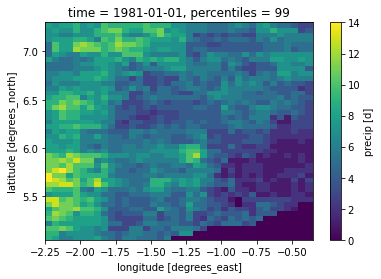

In [9]:
# Compute the number of wet days over the 99th percentile. First calculate the percentile if the variable has 
# already been imported

percent = percentile_doy(da_pr, per=99).sel(percentiles=99)

# Compute the R99p
R99p = xc.indicators.icclim.R99p(da_pr, per=percent)
R99p.sel(time='1981-01-01T00').plot()

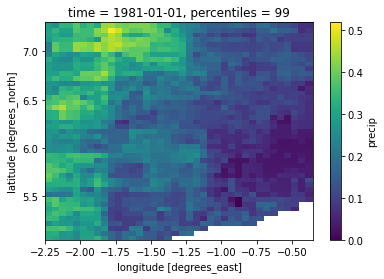

In [10]:
# Compute the amount of rainfall accummulated over the 99th percentile

R99pTot = xc.indicators.icclim.R99pTOT(da_pr, per=percent)
R99pTot.sel(time='1981-01-01T00').plot()

## Temperature indecies

We will now demonstrate computing temperature indecies on ERA5 data. Because the computation of percentiles below uses a lot of system memory, and you might be on a laptop which doesn't have anough memory for this computation, we will here also demonstrate how to use [dask](https://dask.org/) to do out-of-memory computation, allowing you to work on datasets that are bigger than can fit in memory. Dask also enables scaling computation across multiple processors which can be helpful on multi-core systems when working with big datasets.

We will start by setting up a set of `dask` workers with the `distributed` package. Here we will use two workers with 1GB memory limit each (you can increase these numbers if your computer has more memory or cores). You can click on the "dashboard" link to follow along the calculation progress as it is processing.

In [3]:
from distributed import Client
client = Client(n_workers=2, threads_per_worker=1, memory_limit='1GB') 
client

Client Scheduler: tcp://127.0.0.1:36877 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 2 Memory: 2.00 GB


The only difference when we were using `xarray` before is that now we will provide a `chunks` argument, which sets how the data should be split in memory. We'll start by putting 10 longitude strips in each chunk (since all timesteps are needed for the calculating the percentiles chunking along the time coordinate won't help us).

In [4]:
ds_era5 = xr.open_dataset(data_path / 'ERA5_t2m_West_Africa.nc', chunks={'longitude': 10})
ds_era5

<xarray.Dataset>
Dimensions:    (latitude: 77, longitude: 153, time: 7671)
Coordinates:
  * longitude  (longitude) float32 -18.0 -17.75 -17.5 -17.25 ... 19.5 19.75 20.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 3.75 3.5 3.25 3.0
  * time       (time) datetime64[ns] 2000-01-01T14:00:00 ... 2020-12-31T14:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(7671, 77, 10), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2021-05-23 17:21:22 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [13]:
# from this dataset we will be using the 2m-temperature
da_t2m = ds_era5.t2m
da_t2m

<xarray.DataArray 't2m' (time: 7671, latitude: 77, longitude: 153)>
dask.array<open_dataset-1d47cfb1d777a6ddf0d2d3431e4747b2t2m, shape=(7671, 77, 153), dtype=float32, chunksize=(7671, 77, 10), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -18.0 -17.75 -17.5 -17.25 ... 19.5 19.75 20.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 3.75 3.5 3.25 3.0
  * time       (time) datetime64[ns] 2000-01-01T14:00:00 ... 2020-12-31T14:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

In constrast to previously you will notice that as well as the data array size the chunk size is also displayed. Also, no computation has been done at this point. `dask` will lazily load only the required data from disk exacly when it is needed (if you explicitly want dask to do all calculations you can always call `.compute()` on a data-array or dataset)

In [14]:
# Compute the mean of daily average temperature
tg = xc.indicators.icclim.TG(da_t2m, freq='YS')
tg

,Array,Chunk
Bytes,989.60 kB,3.08 kB
Shape,"(21, 77, 153)","(1, 77, 10)"
Count,1361 Tasks,336 Chunks
Type,float32,numpy.ndarray


In [15]:
# Compute the number of days with daily mean temperature below the 10th percentile.
da_t2m_percentiles = percentile_doy(da_t2m, per=10)
da_t2m_percentiles

/home/earlcd/anaconda2/envs/lagtraj/lib/python3.6/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/earlcd/anaconda2/envs/lagtraj/lib/python3.6/site-packages/xclim/core/calendar.py:487: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  output_sizes={"percentiles": len(per)},


,Array,Chunk
Bytes,17.25 MB,1.13 MB
Shape,"(77, 153, 366, 1)","(77, 10, 366, 1)"
Count,651 Tasks,16 Chunks
Type,float32,numpy.ndarray


In [16]:
tn10 = da_t2m_percentiles.sel(percentiles=10)
TG10p = xc.indicators.icclim.TG10p(da_t2m, t10=tn10)
TG10p.compute()

<xarray.DataArray 't2m' (time: 21, latitude: 77, longitude: 153)>
array([[[ 63,  62,  65, ...,  90,  95,  93],
        [ 60,  59,  53, ...,  94,  91,  93],
        [ 60,  55,  51, ...,  98,  91,  94],
        ...,
        [ 69,  63,  63, ...,  41,  39,  39],
        [ 68,  65,  64, ...,  42,  44,  38],
        [ 78,  70,  71, ...,  45,  43,  43]],

       [[ 25,  29,  26, ...,  55,  48,  48],
        [ 28,  29,  26, ...,  56,  51,  51],
        [ 26,  29,  26, ...,  55,  53,  53],
        ...,
        [ 68,  71,  65, ...,  39,  40,  38],
        [ 70,  71,  67, ...,  36,  37,  38],
        [ 76,  71,  67, ...,  33,  39,  46]],

       [[ 83,  86,  85, ...,  49,  46,  48],
        [ 89,  87,  86, ...,  48,  45,  46],
        [ 92,  91,  89, ...,  47,  46,  43],
        ...,
...
        ...,
        [ 27,  30,  34, ...,  41,  43,  42],
        [ 33,  36,  33, ...,  40,  39,  40],
        [ 34,  35,  35, ...,  38,  42,  40]],

       [[ 62,  69,  71, ...,  13,  11,  19],
        [ 63,  72,  77, ...,  16,  15,  14],
        [ 68,  66,  80, ...,  15,  16,  15],
        ...,
        [ 11,  10,   7, ...,  27,  29,  29],
        [ 14,  13,  12, ...,  29,  31,  26],
        [ 12,  12,   9, ...,  26,  28,  28]],

       [[ 17,  17,  16, ...,  27,  22,  20],
        [ 12,  15,  15, ...,  22,  22,  20],
        [ 11,  12,  21, ...,  22,  20,  24],
        ...,
        [  7,   6,  10, ...,  36,  36,  39],
        [  9,  10,   6, ...,  33,  36,  38],
        [ 11,  10,   7, ...,  31,  34,  32]]])
Coordinates:
  * time         (time) datetime64[ns] 2000-01-01 2001-01-01 ... 2020-01-01
  * longitude    (longitude) float32 -18.0 -17.75 -17.5 ... 19.5 19.75 20.0
  * latitude     (latitude) float32 22.0 21.75 21.5 21.25 ... 3.75 3.5 3.25 3.0
    percentiles  int64 10
Attributes:
    units:    d

The examples shown today did not include plotting of the results obtained from the climate indices. Good news is, we have been introduced to how to select, an xarray dataset, use the groupby function and make sample plots in matplotlib and cartopy.

The following exercises will help you to incorporate all these various components you have learnt so far. 

<b>Exercises 5</b>: 

1. (a) Compute the consecutive dry days (CDD) at the Pra river catchment on the annual and seasonal frequencies.

   (b) Make a simple spatial plot of the annual CDD frequency for 1998.
   
   (c) Make a simple spatial plot of the seasonal CDD frequency. HINT: Use the groupby function after  computations to sort results into seasons before plotting.
   
   (d) Prepare a plot with cartopy for CDD variations in 1981, 1991, 2001 and 2011. 
   

2. Repeat questions 1a-d using the temperature


3. Compute and plot the number of days in which rainfall was above the 75th percentile (R75p) and the associated rainfall accummulation (R75pTOT).


4. Compute plot the number of days when rainfall was over 20mm (R20mm).


5. Compute and plot the number of days with daily mean temperature over the 90th percentile.

